In [1]:
from random import shuffle
from math import *
import pandas as pd
import matplotlib.pyplot as plt

# Hill Climbing for TCP

### File berlin52.txt
### Benchmark berlin52 : 7542
### My best: 7782

In [4]:
# зчитування координатів з файлу
def readCoordinates(inputFile):
    cityCoordinates = []

    data = open(inputFile)

    for line in data:
        if ' ' in line:
            x, y = line.strip().split(' ')
            cityCoordinates.append((float(x), float(y)))
    return cityCoordinates


#def calcDistances(cityCoordinates):
#    distances = {}
#
#    for i, (x1, y1) in enumerate(cityCoordinates):
#        for j, (x2, y2) in enumerate(cityCoordinates):
#            distances[i, j] = ceil(sqrt((x2-x1)**2 + (y2-y1)**2))
#    return distances
#
#
#def calcDistances(cityCoordinates):
#    n = len(cityCoordinates)
#    distances = [[0] * n for _ in range(n)]
#
#    for i in range(n):
#        for j in range(n):
#            x1, y1 = cityCoordinates[i]
#            x2, y2 = cityCoordinates[j]
#            distances[i][j] = ceil(sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
#    return distances
                
        
# генерування сусідів (перестановки)
def generateNeighbours(tour):
    # згенер. 2 рандомні послідовності
    randomSequence1 = range(len(tour))
    shuffle(list(randomSequence1))
    randomSequence2 = range(len(tour))
    shuffle(list(randomSequence2))

    # генер. всіх сусідів початкового туру
    for i in randomSequence1:
        for j in randomSequence2:

            # не перевертати ті самі пари двічі
            if i < j:
                temp = list(tour)
                temp[i], temp[j] = tour[j], tour[i]
                yield temp
                
                
# генерування сусідів (2опт)               
def generateNeighbours2Opt(tour):
    n = len(tour)
    for i in range(n - 1):
        for j in range(i + 2, n):
            # Сусідні вершини
            if j - i == 2:
                continue
          
            newTour = tour[:i] + tour[i:j][::-1] + tour[j:]
            yield newTour
            

# генерування рандомного початкового туру
def generateInitialTour(numberOfCities):
    tour = list(range(numberOfCities))
    shuffle(tour)
    return tour


# розрахунок цільової функції
def objectiveFunction(cityCoordinates, tour):
    tourLength = 0
    n = len(tour)
    
    for i in range(n):
        j = (i + 1) % n
        x1, y1 = cityCoordinates[tour[i]]
        x2, y2 = cityCoordinates[tour[j]]
        distance = ceil(sqrt((x2 - x1)**2 + (y2 - y1)**2))
        tourLength += distance
    
    return tourLength


# порівнює всі можливі наступники позиції на пагорбі та вибирає кращий серед них.
# потім він порівнює поточне значення з найкращим сусідом. Якщо сусід кращий, він стає новим кращим
def hillClimbing(numberOfCities, maxIterations, coordinates, numberOfStarts):
    tours = pd.DataFrame(columns={"tour" : 1, "value": 2, "change": 3})
    
    for i in range(numberOfStarts):
        bestTour = generateInitialTour(numberOfCities)
        bestValue = objectiveFunction(coordinates, bestTour)
        #counter = 0
        tmpChange = []
        tmpChange.append(bestValue)
        
        for i in range(maxIterations):
            #moved = False

            # перевірка всіх сусідів поточного значення шляхом ітерації через генератор
            for neighbour in generateNeighbours2Opt(bestTour):
                neighbourValue = objectiveFunction(coordinates, neighbour)
                
                # рух на гору, якщо сусід кращий за поточне значення
                if neighbourValue < bestValue:
                    bestTour = neighbour
                    bestValue = neighbourValue
                    #counter += 1
                    #moved = True
                    tmpChange.append(bestValue)
                    break

            #if moved == False:
                #break
                
        tours.loc[len(tours)] = [bestTour, bestValue, tmpChange] 
        
    return (tours)


def calcCharacteristics(tours):
    bestTour = tours[tours['value'] == min(tours['value'])]
    worstTour = tours[tours['value'] == max(tours['value'])]
    
    difference = worstTour['value'].values[0] - bestTour['value'].values[0]
    
    return (bestTour, worstTour, difference)


def printCharacteristics(tours, bestTour, worstTour, difference) :
    print("Tours:")
    display(tours) 
    
    print("Best tour:")
    display(bestTour.style.hide_index()) 
    
    print("Worst tour:")
    display(worstTour.style.hide_index())
    
    print("Difference: ", difference)
    
    
def printHist(tours):
    plt.figure(figsize=(20, 12))
    plt.hist(tours['value'].values)
    plt.xlabel('F(x)')
    plt.ylabel("Count")
    plt.title("Histogram of the obtained solutions")
    plt.show()

    
def printDiagram(tours, iterations):
    res = tours['change'][0] + tours['change'][1] + tours['change'][2]
    plt.figure(figsize=(20, 12))
    plt.plot(range(len(res)), res)
    plt.xlabel('Iterations')
    plt.ylabel("F(x)")
    plt.title("Graph of convergence of the objective function")
    plt.show()

Tours:


,tour,value,change
0,"[44, 31, 0, 21, 20, 30, 17, 2, 16, 41, 6, 1, 2...",8842,"[28704, 28635, 28420, 28162, 28155, 27995, 279..."
1,"[51, 10, 50, 11, 24, 3, 42, 9, 32, 8, 7, 40, 1...",8874,"[28923, 28897, 26911, 26840, 26549, 25840, 254..."
2,"[27, 25, 46, 13, 12, 51, 26, 10, 50, 32, 42, 9...",8605,"[30496, 30300, 30219, 30152, 30072, 29523, 291..."
3,"[4, 23, 47, 45, 43, 15, 28, 49, 19, 22, 29, 1,...",9066,"[29273, 29173, 28542, 27857, 26783, 26756, 265..."
4,"[0, 21, 48, 31, 44, 18, 7, 9, 8, 40, 2, 17, 30...",8685,"[31367, 31328, 30966, 30689, 30358, 30193, 299..."
...,...,...,...
495,"[9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27...",8076,"[30556, 30534, 30060, 29998, 29608, 29512, 295..."
496,"[17, 16, 6, 1, 41, 20, 30, 21, 0, 22, 19, 49, ...",8908,"[33704, 33579, 32856, 32728, 32416, 32268, 320..."
497,"[12, 26, 27, 25, 46, 28, 49, 19, 15, 43, 45, 4...",8297,"[30616, 30573, 30400, 30271, 30251, 30240, 301..."
498,"[1, 6, 29, 22, 19, 49, 28, 15, 46, 25, 27, 26,...",8435,"[31802, 31250, 31221, 31053, 29845, 29753, 296..."


Best tour:


tour,value,change
"[9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 47, 23, 37, 39, 36, 38, 34, 35, 33, 45, 43, 15, 49, 19, 22, 28, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21, 0, 48, 31, 44, 18, 40, 7, 8]",7782,"[31051, 30770, 30710, 30248, 29772, 29539, 29500, 28705, 28610, 28528, 28427, 27984, 27976, 27648, 27187, 26072, 26031, 26017, 25991, 25849, 25780, 25773, 25331, 25124, 25001, 24491, 24261, 23805, 23566, 23007, 22564, 22524, 22306, 22270, 20822, 20433, 20367, 20179, 19705, 19375, 19365, 19077, 19040, 18626, 18403, 18360, 18324, 18213, 18182, 18038, 17983, 17806, 17661, 17362, 17357, 17296, 17210, 16982, 16930, 16896, 16670, 16593, 16524, 16474, 16415, 16401, 16178, 16115, 15981, 15948, 15751, 15671, 15492, 15402, 14788, 14335, 14271, 13769, 13662, 13637, 13609, 13408, 13272, 13148, 13107, 12980, 12941, 12910, 12892, 12857, 12806, 12417, 12380, 12322, 12298, 12273, 12036, 11719, 11703, 11475, 11468, 11431, 11430, 11410, 11405, 11378, 11345, 11307, 11284, 11241, 11169, 11120, 11076, 11072, 11045, 11028, 11016, 10996, 10944, 10940, 10906, 10903, 10667, 10598, 10579, 10578, 10559, 10520, 10313, 10238, 9230, 8924, 8824, 8806, 8725, 8656, 8651, 8620, 8600, 8540, 8516, 8462, 8452, 8383, 8209, 7963, 7956, 7949, 7782]"


Worst tour:


tour,value,change
"[28, 49, 19, 22, 20, 29, 1, 6, 41, 16, 2, 17, 30, 21, 0, 43, 33, 38, 34, 35, 48, 31, 44, 18, 40, 7, 8, 42, 9, 32, 50, 51, 10, 13, 12, 26, 25, 27, 11, 24, 3, 5, 4, 14, 37, 39, 36, 23, 47, 45, 15, 46]",9555,"[30668, 30381, 29340, 28866, 27838, 27718, 27452, 27365, 26882, 26417, 26118, 25070, 24933, 24888, 24843, 24080, 23319, 23224, 22640, 22113, 21708, 21658, 21479, 21433, 21301, 21188, 20984, 20861, 20840, 20765, 20733, 20655, 20342, 20290, 20261, 20220, 20083, 20047, 19941, 19500, 19446, 19116, 19109, 19071, 18982, 18591, 18529, 18528, 18430, 18354, 18310, 18103, 17830, 17646, 17546, 17297, 17145, 17119, 16774, 16735, 16566, 16215, 16115, 16046, 15989, 15956, 15902, 15842, 15772, 15613, 15323, 15277, 15189, 15045, 14779, 14687, 14671, 14647, 14611, 14449, 13741, 13722, 13648, 13608, 13543, 13535, 13521, 13514, 13500, 13230, 13197, 12897, 12891, 12883, 12880, 12559, 12553, 12550, 12506, 12500, 12485, 12447, 12332, 11933, 11926, 11895, 11894, 11892, 11886, 11845, 11809, 11798, 11642, 11631, 11392, 11375, 11358, 11312, 11236, 11091, 10998, 10526, 10447, 10183, 9841, 9583, 9555]"


Difference:  1773


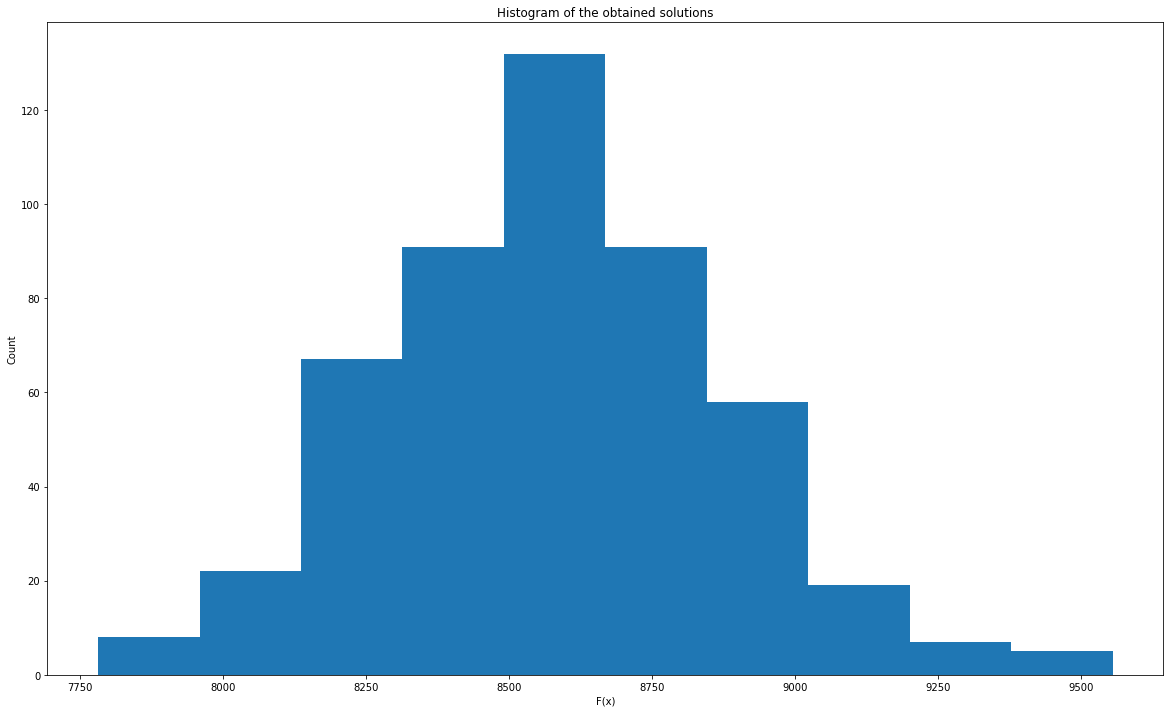

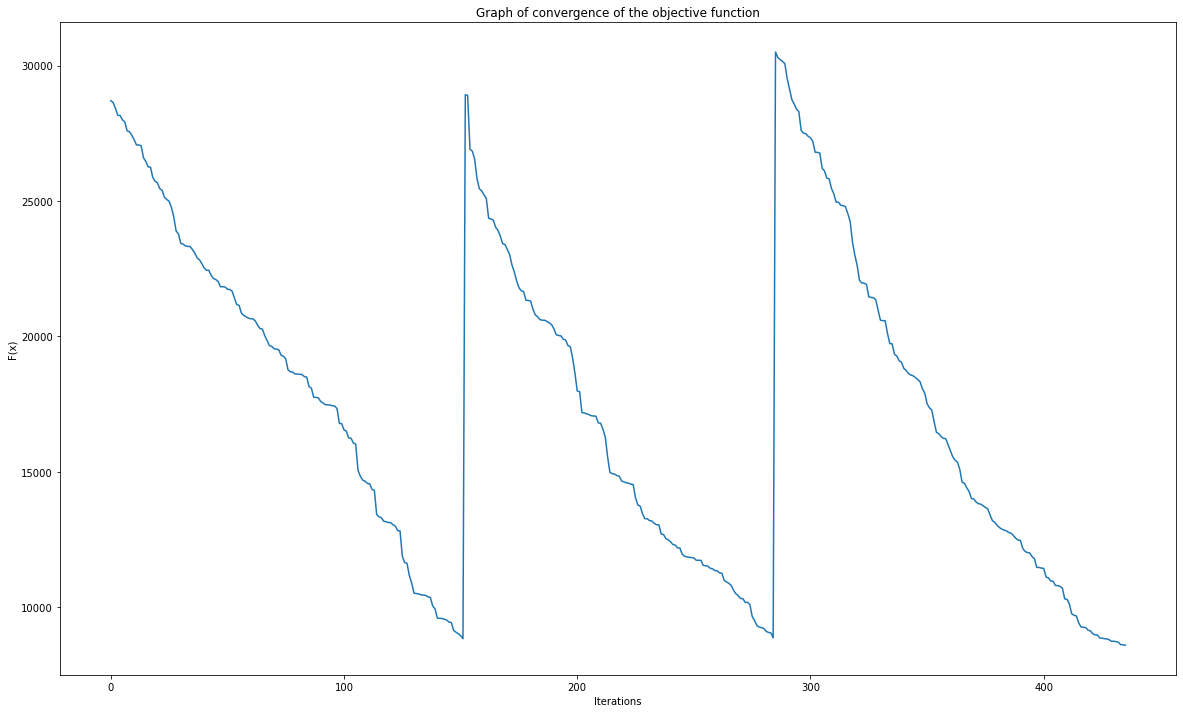

In [9]:
coordinates = readCoordinates("data/berlin52.txt")

numberOfCities = len(coordinates)

initialTour = generateInitialTour(numberOfCities)

maxIterations = 200

numberOfStarts = 500

tours = hillClimbing(
    numberOfCities, maxIterations, coordinates, numberOfStarts)

bestTour, worstTour, difference = calcCharacteristics(tours)

printCharacteristics(tours, bestTour, worstTour, difference)

printHist(tours)

printDiagram(tours, maxIterations)